In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

def unpack(df, column, fillna=None):
    ret = None
    if fillna is None:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems()))], axis=1)
        del ret[column]
    else:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems())).fillna(fillna)], axis=1)
        del ret[column]
    return ret

In [12]:
ResultsDF=pd.read_csv('all_policies_results.csv')
#ResultsDF['Policies'] = ResultsDF['Policies'].str.replace('(',"{")
#ResultsDF['Policies'] = ResultsDF['Policies'].str.replace(')','}')
#ResultsDF['Policies'] = ResultsDF['Policies'].str.replace(":',","': ")


In [13]:
ResultsDF

,Phase-Out,Net-Zero,Retrofitting,Lightweighting,Modal Shift,Scrap Age,Regulated EV manufacture,Emissions,Energy
0,2025,2020,0.0,1400,20,20,0,145.041150,2.203207e+12
1,2025,2020,0.0,1400,20,20,1,117.069805,2.191639e+12
2,2025,2020,0.0,1400,20,18,0,141.397752,2.185169e+12
3,2025,2020,0.0,1400,20,18,1,112.248029,2.173074e+12
4,2025,2020,0.0,1400,20,16,0,139.343444,2.184018e+12
...,...,...,...,...,...,...,...,...,...
5827,2040,2060,0.5,840,-80,14,1,40.413571,6.441332e+11
5828,2040,2060,0.5,840,-80,12,0,43.178627,6.519136e+11
5829,2040,2060,0.5,840,-80,12,1,39.780207,6.503415e+11
5830,2040,2060,0.5,840,-80,10,0,43.802626,6.649214e+11


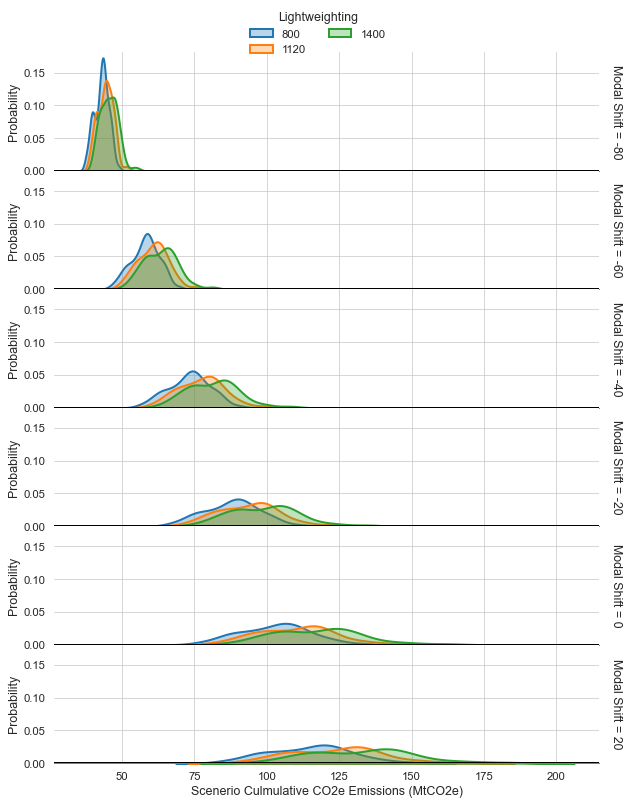

In [17]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Modal Shift", hue="Lightweighting", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Emissions", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Modal Shift=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative CO2e Emissions (MtCO2e)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
new_labels=['800','1120','1400']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.41, 1.05),ncol=2)
for t, l in zip(ridge_plot._legend.texts, new_labels):
    t.set_text(l)

ridge_plot.savefig("Emissions_ModalShiftWithLightweighting.png")


When you have a big modal shift, changing weights of new cars doesn't affect emissions much

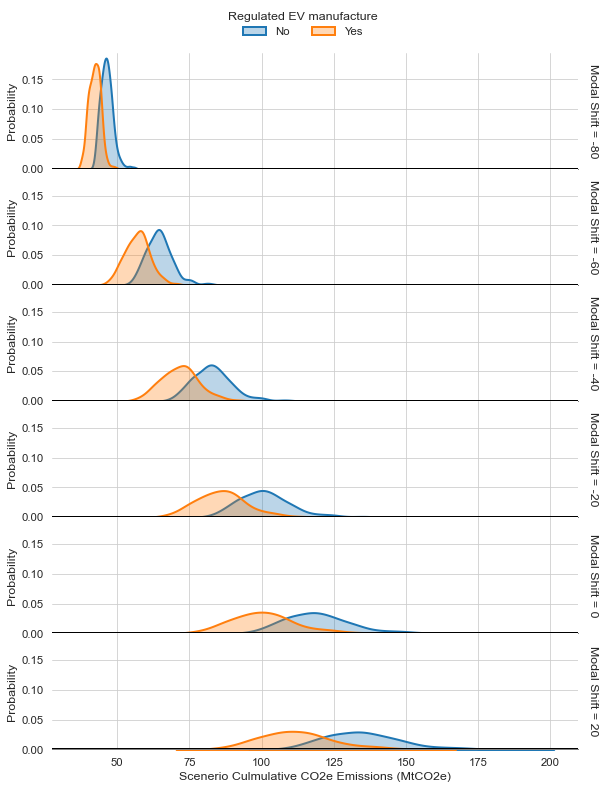

In [413]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Modal Shift", hue="Regulated EV manufacture", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Emissions", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Modal Shift=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative CO2e Emissions (MtCO2e)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
new_labels=['No','Yes']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.41, 1.05),ncol=2)
for t, l in zip(ridge_plot._legend.texts, new_labels):
    t.set_text(l)

ridge_plot.savefig("Emissions_ModalShiftWithRegulatedEV.png")


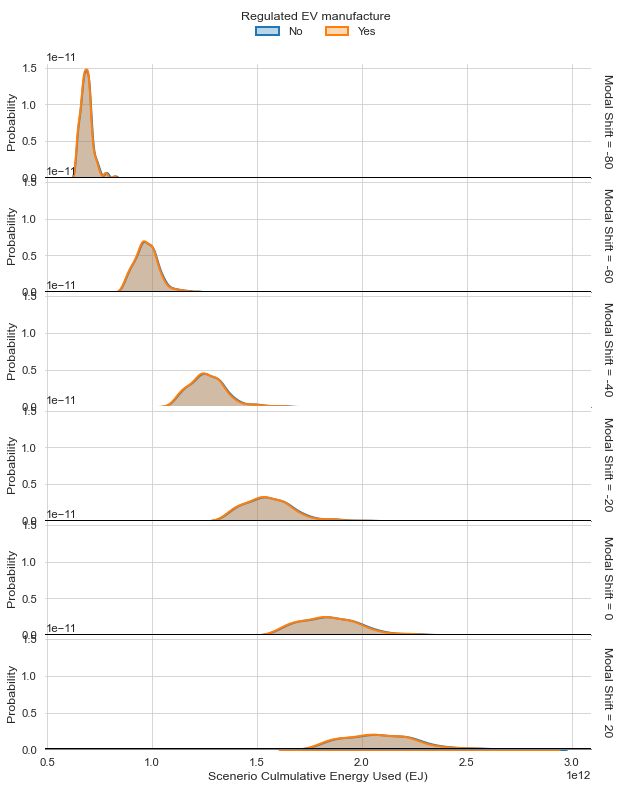

In [414]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Modal Shift", hue="Regulated EV manufacture", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Energy", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Modal Shift=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative Energy Used (EJ)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
new_labels=['No','Yes']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.41, 1.05),ncol=2)
for t, l in zip(ridge_plot._legend.texts, new_labels):
    t.set_text(l)

ridge_plot.savefig("Energy_ModalShiftWithRegulatedEV.png")


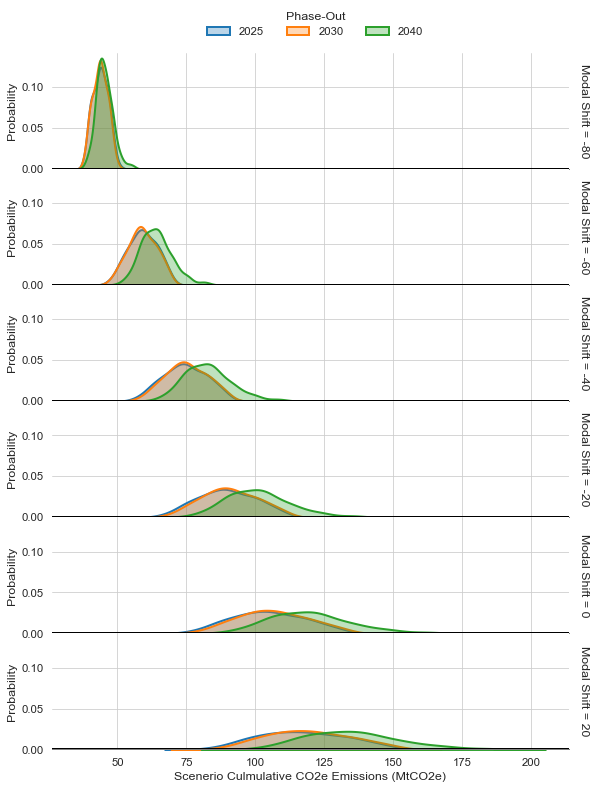

In [415]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Modal Shift", hue="Phase-Out", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Emissions", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Modal Shift=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative CO2e Emissions (MtCO2e)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
new_labels=['2025','2030','2040']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.4, 1.05),ncol=3)
for t, l in zip(ridge_plot._legend.texts, new_labels):
    t.set_text(l)

ridge_plot.savefig("Emissions_ModalShiftWithPhaseOut.png")


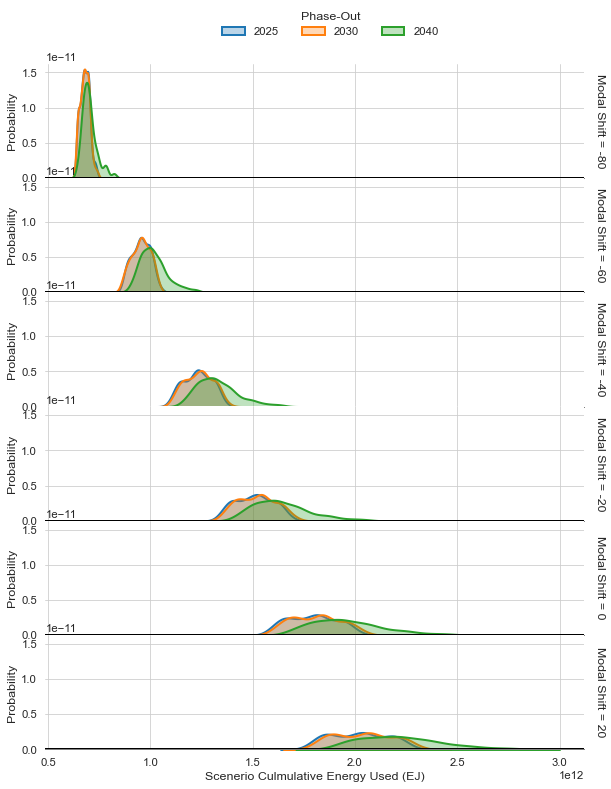

In [416]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Modal Shift", hue="Phase-Out", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Energy", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Modal Shift=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative Energy Used (EJ)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
new_labels=['2025','2030','2040']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.4, 1.05),ncol=3)
for t, l in zip(ridge_plot._legend.texts, new_labels):
    t.set_text(l)

ridge_plot.savefig("Energy_ModalShiftWithPhaseOut.png")


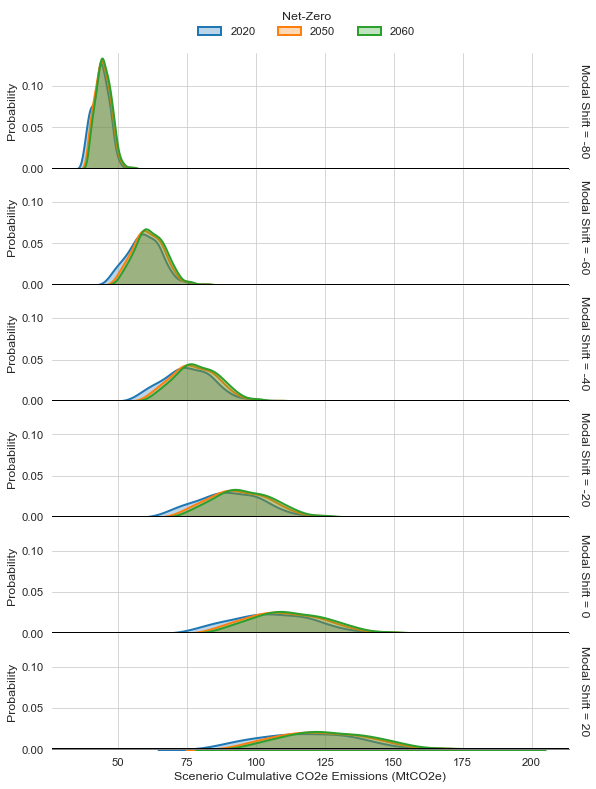

In [417]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Modal Shift", hue="Net-Zero", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Emissions", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Modal Shift=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative CO2e Emissions (MtCO2e)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
#new_labels=['2020','2050','2060']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.390, 1.05),ncol=3)
#for t, l in zip(ridge_plot._legend.texts, new_labels):
#    t.set_text(l)

ridge_plot.savefig("Emissions_ModalShiftWithNetZero.png")


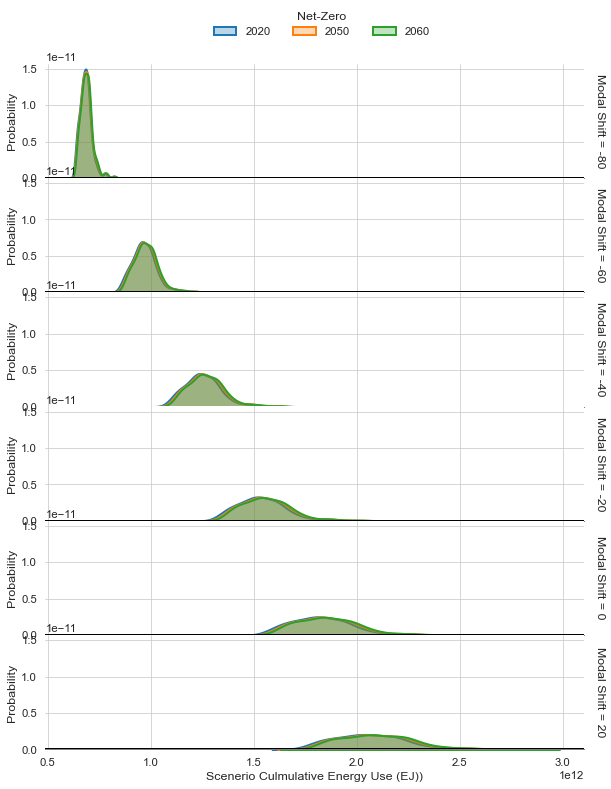

In [418]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Modal Shift", hue="Net-Zero", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Energy", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Modal Shift=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative Energy Use (EJ))", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
#new_labels=['2020','2050','2060']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.390, 1.05),ncol=3)
#for t, l in zip(ridge_plot._legend.texts, new_labels):
#    t.set_text(l)

ridge_plot.savefig("Energy_ModalShiftWithNetZero.png")


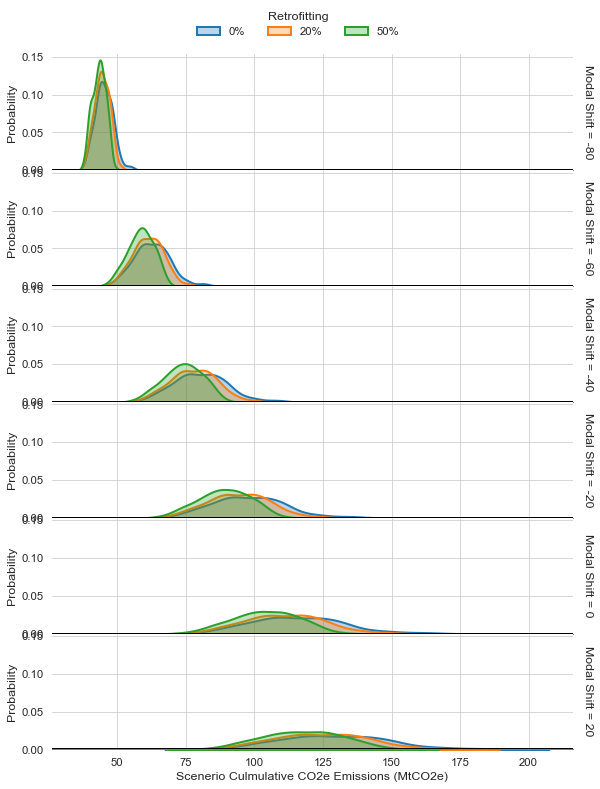

In [419]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Modal Shift", hue="Retrofitting", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Emissions", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Modal Shift=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative CO2e Emissions (MtCO2e)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
new_labels=['0%','20%','50%']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.39, 1.05),ncol=3)
for t, l in zip(ridge_plot._legend.texts, new_labels):
    t.set_text(l)

ridge_plot.savefig("Emissions_ModalShiftWithRetrofitting.png")


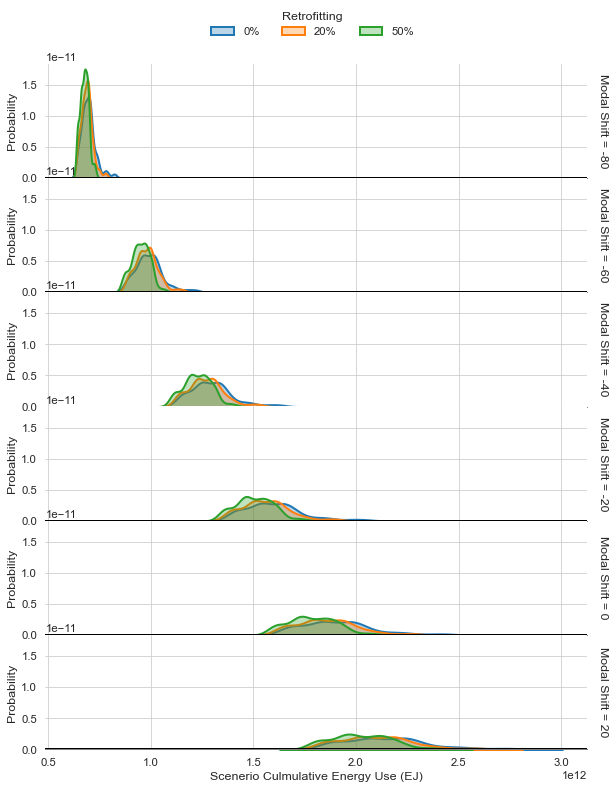

In [420]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Modal Shift", hue="Retrofitting", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Energy", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Modal Shift=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative Energy Use (EJ)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
new_labels=['0%','20%','50%']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.39, 1.05),ncol=3)
for t, l in zip(ridge_plot._legend.texts, new_labels):
    t.set_text(l)

ridge_plot.savefig("Energy_ModalShiftWithRetrofitting.png")


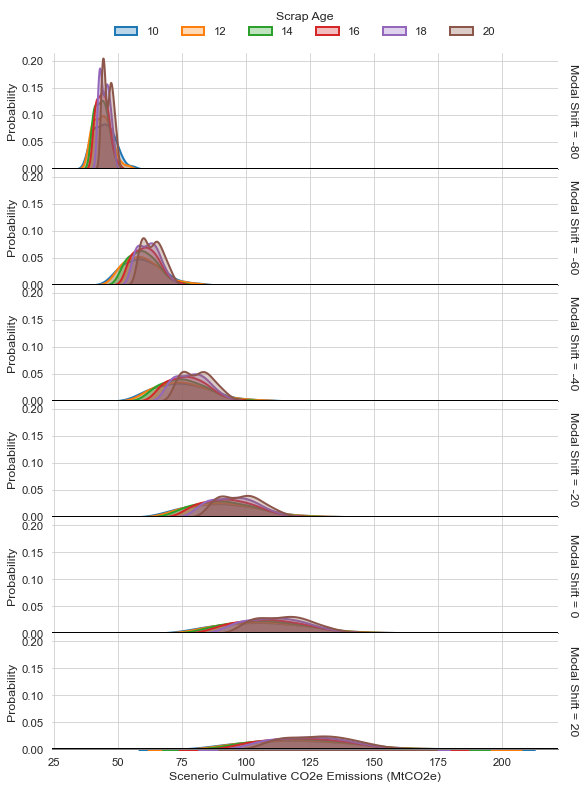

In [421]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Modal Shift", hue="Scrap Age", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Emissions", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Modal Shift=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative CO2e Emissions (MtCO2e)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
#new_labels=['0%','20%','50%']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.33, 1.05),ncol=6)
#for t, l in zip(ridge_plot._legend.texts, new_labels):
#    t.set_text(l)

ridge_plot.savefig("Emissions_ModalShiftWithScrapAge.png")


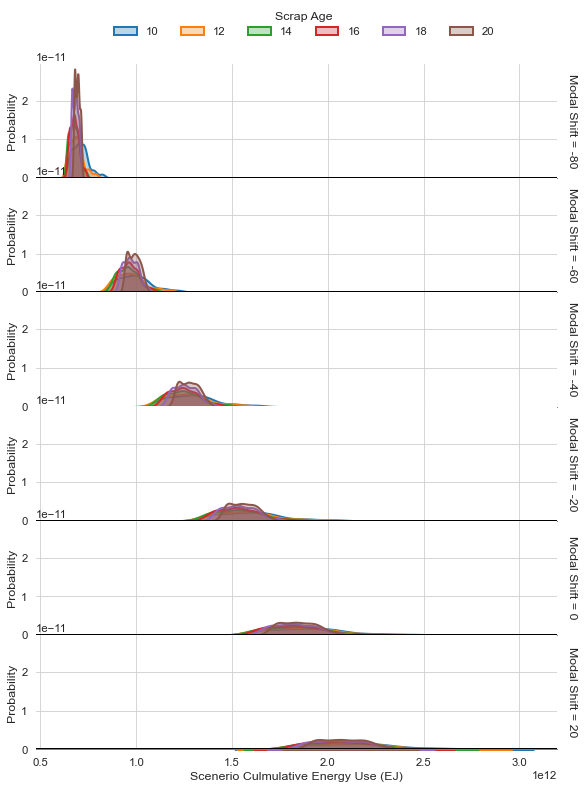

In [422]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Modal Shift", hue="Scrap Age", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Energy", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Modal Shift=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative Energy Use (EJ)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
#new_labels=['0%','20%','50%']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.33, 1.05),ncol=6)
#for t, l in zip(ridge_plot._legend.texts, new_labels):
#    t.set_text(l)

ridge_plot.savefig("Energy_ModalShiftWithScrapAge.png")

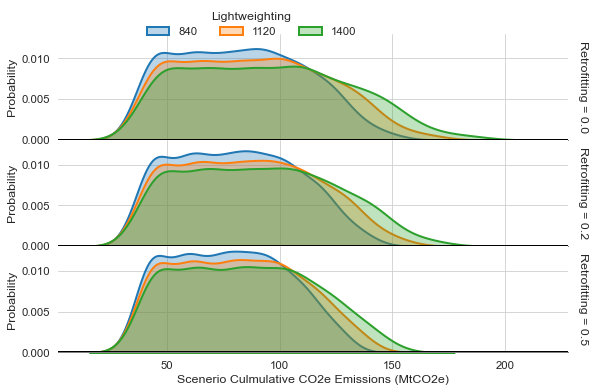

In [423]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Retrofitting", hue="Lightweighting", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Emissions", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Modal Shift=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative CO2e Emissions (MtCO2e)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
#new_labels=['0%','20%','50%']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.33, 1.05),ncol=6)
#for t, l in zip(ridge_plot._legend.texts, new_labels):
#    t.set_text(l)

ridge_plot.savefig("Emissions_LightweightingWithRetrofit.png")


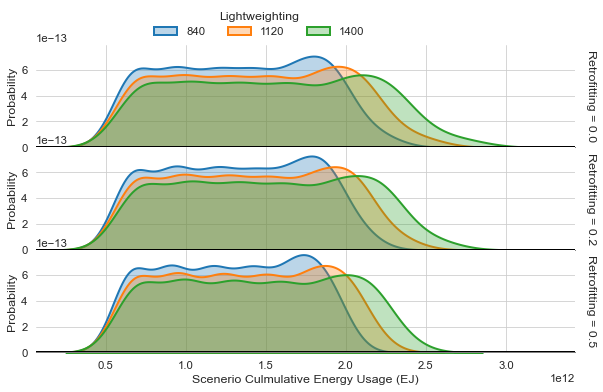

In [424]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Retrofitting", hue="Lightweighting", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Energy", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Modal Shift=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative Energy Usage (EJ)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
#new_labels=['0%','20%','50%']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.33, 1.05),ncol=6)
#for t, l in zip(ridge_plot._legend.texts, new_labels):
#    t.set_text(l)

ridge_plot.savefig("Energy_LightweightingWithRetrofit.png")


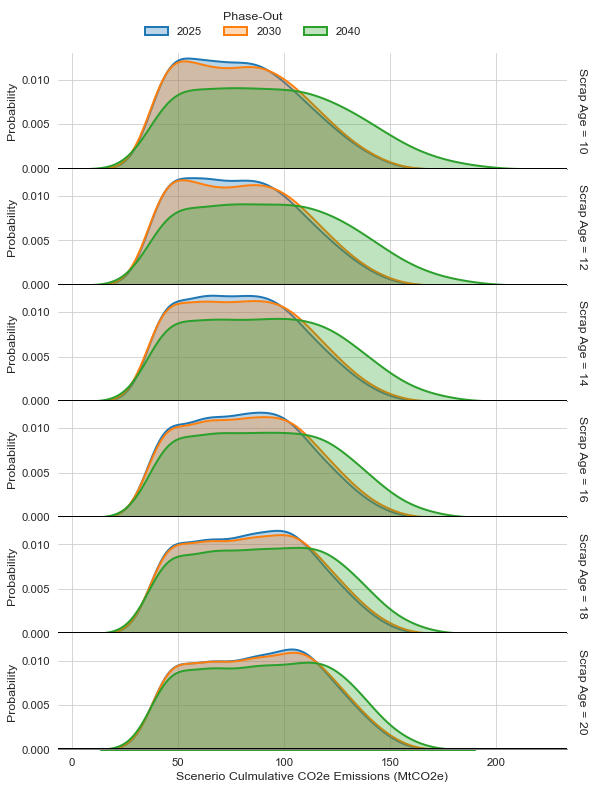

In [425]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Scrap Age", hue="Phase-Out", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Emissions", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Scrap Age=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative CO2e Emissions (MtCO2e)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
#new_labels=['0%','20%','50%']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.33, 1.05),ncol=6)
#for t, l in zip(ridge_plot._legend.texts, new_labels):
#    t.set_text(l)

ridge_plot.savefig("Emissions_ScrapAgewithPhaseOut.png")


Shows that short scrap age of 10 is not always advantageous. In 2025 phase-out case, short scrap age is better to accelerate electrification but in 2040 phase-out, short scrap age is useless & worse because unnecessary manufacturing emissions


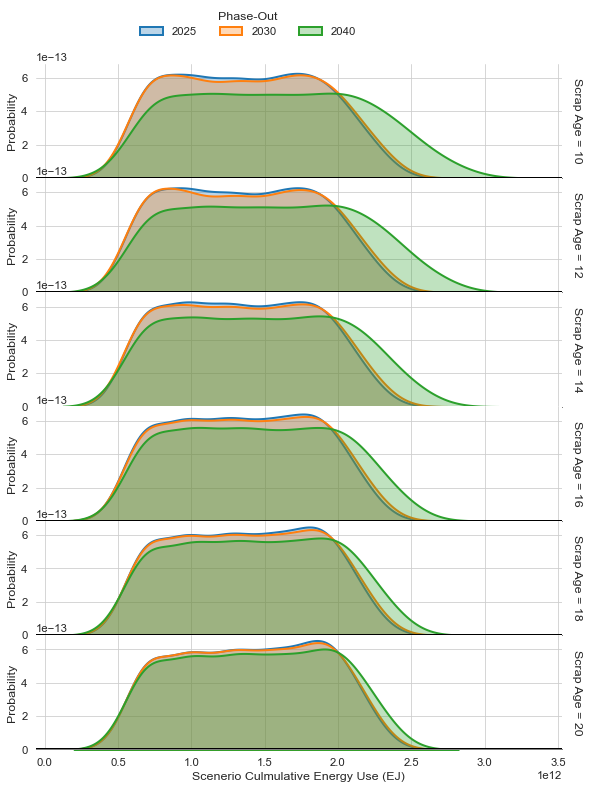

In [426]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Scrap Age", hue="Phase-Out", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Energy", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Scrap Age=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative Energy Use (EJ)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
#new_labels=['0%','20%','50%']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.33, 1.05),ncol=6)
#for t, l in zip(ridge_plot._legend.texts, new_labels):
#    t.set_text(l)

ridge_plot.savefig("Energy_ScrapAgewithPhaseOut.png")


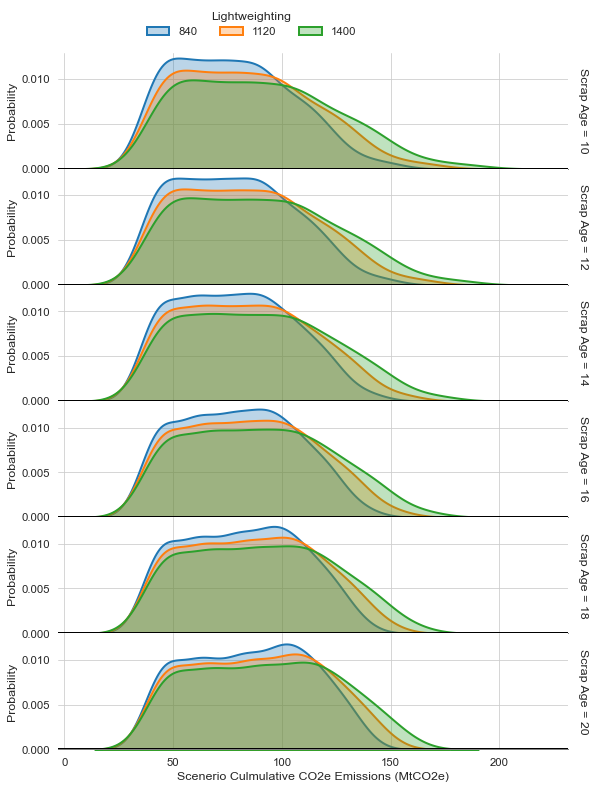

In [427]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Scrap Age", hue="Lightweighting", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Emissions", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Scrap Age=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative CO2e Emissions (MtCO2e)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
#new_labels=['0%','20%','50%']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.33, 1.05),ncol=6)
#for t, l in zip(ridge_plot._legend.texts, new_labels):
#    t.set_text(l)

ridge_plot.savefig("Emissions_ScrapAgewithLightweighting.png")


If you go heavy on lightweighting then that means a lower scrap age is good and a longer scrap age keeps heavier vehicles on the road longer skewing the distribution to more emission scenarios. Again, short scrap age useless unless people get lighter, better new cars

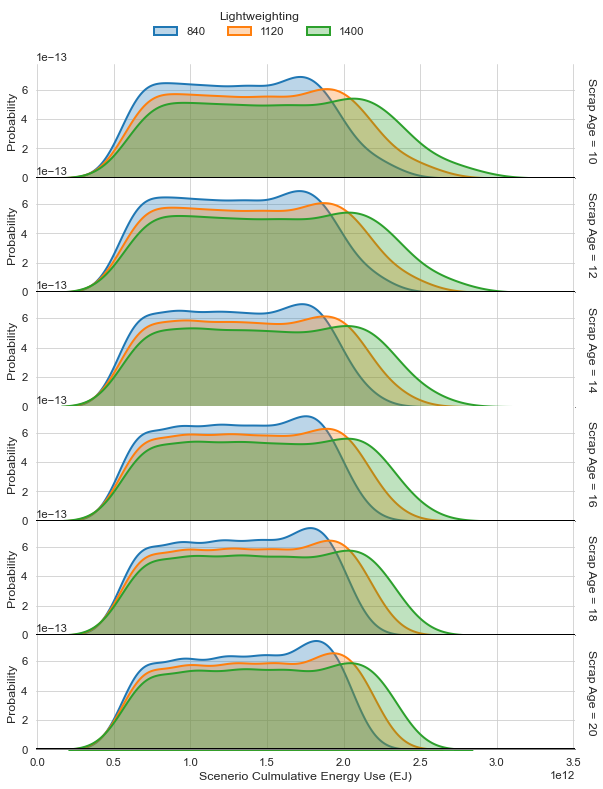

In [428]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Scrap Age", hue="Lightweighting", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Energy", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Scrap Age=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative Energy Use (EJ)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
#new_labels=['0%','20%','50%']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.33, 1.05),ncol=6)
#for t, l in zip(ridge_plot._legend.texts, new_labels):
#    t.set_text(l)

ridge_plot.savefig("Energy_ScrapAgewithLightweighting.png")


In [429]:
ResultsDF

,Phase-Out,Net-Zero,Retrofitting,Lightweighting,Modal Shift,Scrap Age,Regulated EV manufacture,Emissions,Energy
0,2025,2020,0.0,1400,20,20,0,145.041150,2.203207e+12
1,2025,2020,0.0,1400,20,20,1,117.069805,2.191639e+12
2,2025,2020,0.0,1400,20,18,0,141.397752,2.185169e+12
3,2025,2020,0.0,1400,20,18,1,112.248029,2.173074e+12
4,2025,2020,0.0,1400,20,16,0,139.343444,2.184018e+12
...,...,...,...,...,...,...,...,...,...
5827,2040,2060,0.5,840,-80,14,1,40.413571,6.441332e+11
5828,2040,2060,0.5,840,-80,12,0,43.178627,6.519136e+11
5829,2040,2060,0.5,840,-80,12,1,39.780207,6.503415e+11
5830,2040,2060,0.5,840,-80,10,0,43.802626,6.649214e+11


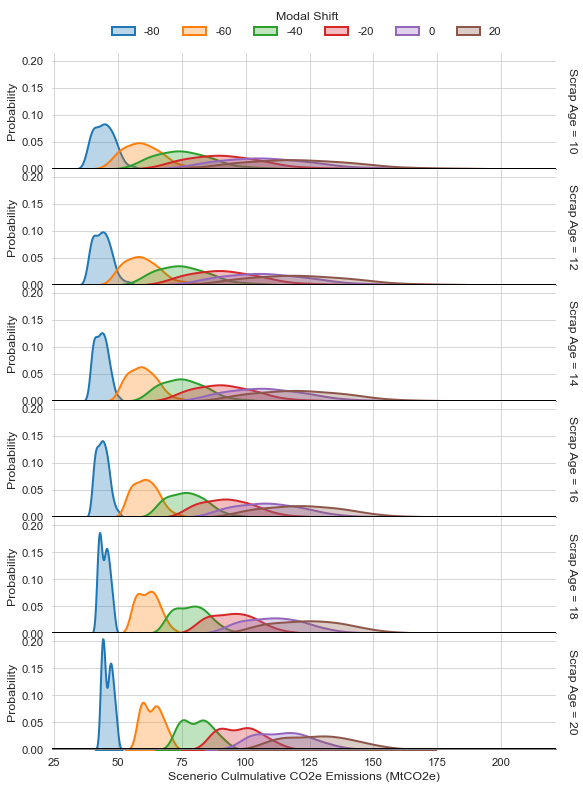

In [430]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Scrap Age", hue="Modal Shift", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Emissions", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Scrap Age=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative CO2e Emissions (MtCO2e)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
#new_labels=['0%','20%','50%']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.33, 1.05),ncol=6)
#for t, l in zip(ridge_plot._legend.texts, new_labels):
#    t.set_text(l)

ridge_plot.savefig("Emissions_ScrapAgeWithModalShift.png")


At -80 modal shift, most manufacturing emissions come from EVs made to fulfill the required no. of cars needed in 2050. So, overall emissions will be highly dependent on the two cases where EV manufacturing emissions are high or low (see diagram 1). Whereas at a normal modal shift, ICEVs are made lots so less dependency on regulated EV manufacture case. 

This is exagerated by a long scrap age (e.g. 20 years) because the longer the scrap age, the less ICEVs are made in the period of 2020-2035 (phase out date) so more dependency on EV manufacture .

Overall, the effect is that the less cars are made (more modal shift and higher scrap age), the more localised and definite the emissions value. So even though more scrapping (e.g. at 10 years) may result in the minimum emission value, it also results in the maximum emissions value as it means many cars are produced in less ideal cases (e.g. 2040 phase-out and 0 retrofitting). So the advantage of high scrap age (e.g. 20 years) is it means cars will never be unnecesarily produced and it provides a more precise cumulative emissions value. This can provide a reason for a ban on all new car sales where people are forced to retain the use of their old car and need to apply for a new one with a good reason. Then, cars will only be produced in situations of necessity and provides more certainty on emissions

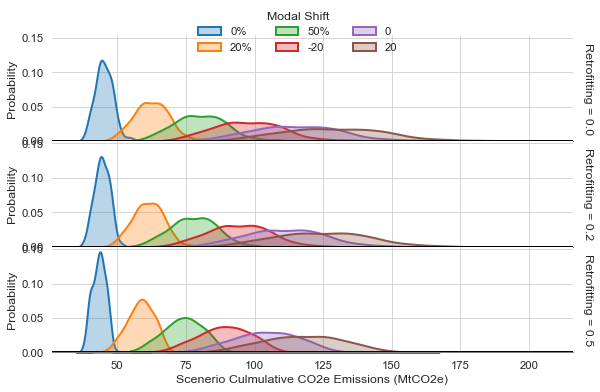

In [431]:
#fig, ax = plt.subplots()
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#000077')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==20) ].Emissions, fill=True,color='#0000FF')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==1) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#770000')
#sns.kdeplot(ResultsDF[(ResultsDF['Regulated EV manufacture']==0) & (ResultsDF['Modal Shift']==-80)].Emissions, fill=True,color='#FF0000')

sns.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'gray'})
sns.set_context("paper", font_scale=1.29)
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(ResultsDF, row="Retrofitting", hue="Modal Shift", aspect=5, height=1.75,margin_titles=True)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "Emissions", clip_on=False, shade=True, alpha=0.3, lw=2)
#g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=True,color='black')
def label(x, color, label):
    ax = plt.gca()
    label='Retrofitting=' +label
    ax.text(0,-0.05, label,rotation='vertical')
    
#ridge_plot.map(label, "Modal Shift")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.001)
# Remove axes details that don't play well with overlap
#ridge_plot.set_titles("")
ridge_plot.set_axis_labels(x_var="Scenerio Culmulative CO2e Emissions (MtCO2e)", y_var="Probability")
#ridge_plot.set(ytitle="Probablility")
#ridge_plot.set(yticks=[])
ridge_plot.despine(left=True)
new_labels=['0%','20%','50%']
ridge_plot.add_legend(loc='upper center',bbox_to_anchor=(0.39, 1.05),ncol=3)
for t, l in zip(ridge_plot._legend.texts, new_labels):
    t.set_text(l)

ridge_plot.savefig("Emissions_RetrofittingWithModalShift.png")
